# Decentmon data preparation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [2]:
SUBDIR = 7

In [32]:
path = f"{INPUT_DIR}/{SUBDIR}"

f_df = [load_simulation_data(f"{path}/{i}_output.log") for i in PATTERNS]
f_df[0]

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,2,3,3,7,7,2,1.0,4.07,1.00,8,21,12,"Until (Var ""c"", Var ""f"")",{ |b|c|d| | |g} ; { |b| | |e|f|g} ; {a| | | |...
1,1,1,2,4,3,7,9,2,1.0,3.09,1.00,8,36,12,"Until (Var ""b"", Var ""g"")",{a|b| | |e| | } ; { | |c|d| |f| } ; {a| |c|d|...
2,2,1,3,4,3,14,6,0,1.0,1.42,0.00,6,20,6,"Glob (Var ""a"")",{a|b|c|d| | | } ; {a| | | | |f|g} ; { |b|c| |...
3,3,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""d"")",{a|b| | |e|f| } ; {a| |c| | | |g} ; { |b|c| |...
4,4,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""e"")",{a| |c|d|e|f| } ; { |b|c|d|e|f|g} ; { | | |d|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,5106,6,20,22,21,133,16,40,1.0,4.30,2.91,582,1091,626,"Or (And (Next (Glob (Until (Var ""f"", Var ""g"")...",{a| |c| | | |g} ; { |b| | |e|f|g} ; {a|b| |d|...
5107,5107,6,33,38,34,224,48,220,1.0,22.47,10.33,837,7576,2243,"Glob (Or (Or (Next (Var ""g""), And (Var ""f"", V...",{ |b|c| |e| | } ; {a| |c| | | |g} ; { | |c| |...
5108,5108,6,74,76,76,511,60,667,1.0,18.43,15.48,2165,13057,81960,"Until (Neg (Until (Neg (Until (Var ""d"", Var ""...",{a| |c|d| | | } ; { | |c| |e|f|g} ; { |b|c| |...
5109,5109,6,20,24,22,133,26,62,1.0,11.40,4.32,593,2531,1811,"Next (Glob (Or (Glob (Until (Var ""f"", Var ""c""...",{a| | |d|e|f| } ; {a|b|c|d| | |g} ; {a|b| | |...


In [27]:
strategies_f_df = [split_by_dictionary(f_df[i], STRATEGIES) for i in PATTERNS]

print(f"Datasets: {len(strategies_f_df)}. Strategies: {len(strategies_f_df[0])}. Single dataset Formulae:{len(strategies_f_df[0][0])}")
sep_strat_f_df = [pd.concat(strategies_f_df[i], ignore_index=True) for i in PATTERNS]
sep_strat_f_df[7]

Datasets: 8. Strategies: 3. Single dataset Formulae:5111


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,7,1.00,4,"Glob (Var ""g"")",{ | |c|d|e|f|g} ; { |b|c| |e|f| } ; { | | | |...,orchestration
1,1,1,3,14,1.00,12,"Until (Var ""b"", Var ""c"")",{ |b| |d| | | } ; {a|b| | | |f|g} ; { |b|c|d|...,orchestration
2,2,1,2,7,1.00,4,"Glob (Var ""c"")",{ | |c| | |f|g} ; { | | | | |f| } ; { |b| | |...,orchestration
3,3,1,2,7,1.00,3,"Next (Var ""f"")",{ |b|c|d|e| | } ; { | | | | | | } ; {a| |c|d|...,orchestration
4,4,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c| | |f|g} ; { |b| |d| | | } ; { |b|c| |...,orchestration
...,...,...,...,...,...,...,...,...,...
15535,5175,6,22,42,2.93,256,"Glob (Or (Var ""b"", Or (Neg (Var ""d""), Neg (Va...",{a|b| |d| |f| } ; {a| | | |e| | } ; { | |c| |...,choreography
15536,5176,6,38,74,3.18,373,"Glob (Or (Or (Var ""c"", Var ""b""), Var ""e""))",{ | |c| |e|f|g} ; {a|b| | | | | } ; { | |c|d|...,choreography
15537,5177,6,36,278,12.39,2873,"And (Or (Next (Or (And (Var ""c"", Ev (Next (Va...",{a| |c| | |f| } ; { |b|c| | |f|g} ; { |b| |d|...,choreography
15538,5178,6,18,17,1.41,104,"Glob (Until (Var ""f"", Var ""a""))",{a|b|c| |e|f|g} ; { | | |d|e|f| } ; { |b| | |...,choreography


In [19]:
sep_strat_f_df[3]['formula'].unique()

array([' Next (Var "g") ', ' Next (Var "f") ', ' Ev (Var "c") ', ...,
       ' Glob (Until (Var "f", Or (Var "e", Var "b"))) ',
       ' And (Glob (Until (Or (Var "b", Var "f"), Until (Var "d", Var "a"))), Glob (Next (Until (Glob (Var "b"), Ev (Var "g"))))) ',
       ' And (Or (And (Glob (Next (Next (Var "g"))), Glob (Var "f")), Ev (And (Or (And (Var "c", Or (And (Neg (Var "b"), Neg (Var "a")), Glob (Neg (Var "g")))), Until (And (Glob (Or (Neg (Var "f"), Var "b")), Glob (Or (Neg (Var "b"), Var "f"))), And (Until (Var "d", Var "e"), Glob (Var "f")))), Or (Neg (Until (And (Glob (Or (Neg (Var "f"), Var "b")), Glob (Or (Neg (Var "b"), Var "f"))), And (Until (Var "d", Var "e"), Glob (Var "f")))), Or (Neg (Var "c"), And (Or (Var "b", Var "a"), Ev (Var "g"))))))), Or (Glob (Or (And (Or (Neg (Var "c"), And (Or (Var "b", Var "a"), Ev (Var "g"))), Neg (Until (And (Glob (Or (Neg (Var "f"), Var "b")), Glob (Or (Neg (Var "b"), Var "f"))), And (Until (Var "d", Var "e"), Glob (Var "f"))))), And (Unti

In [5]:
sep_strat_f_df[0]['formula'].iloc[4398]

' And (Or (Neg (Until (Or (Ev (Next (Var "g")), Ev (And (Or (Neg (Var "e"), Var "a"), Or (Neg (Var "a"), Var "e")))), And (Next (Next (Var "e")), Next (Next (Var "b"))))), And (Or (Neg (Until (Next (Until (Var "a", Var "c")), Glob (Var "b"))), And (Or (And (Glob (Neg (Var "f")), And (Neg (Var "e"), Neg (Var "g"))), Glob (Var "e")), Or (Ev (Neg (Var "e")), Or (Ev (Var "f"), Or (Var "e", Var "g"))))), Or (Or (And (Or (Ev (Var "f"), Or (Var "e", Var "g")), Ev (Neg (Var "e"))), And (Glob (Var "e"), And (Glob (Neg (Var "f")), And (Neg (Var "e"), Neg (Var "g"))))), Until (Next (Until (Var "a", Var "c")), Glob (Var "b"))))), Or (Or (And (Until (Next (Until (Var "a", Var "c")), Glob (Var "b")), Or (And (Or (Ev (Var "f"), Or (Var "e", Var "g")), Ev (Neg (Var "e"))), And (Glob (Var "e"), And (Glob (Neg (Var "f")), And (Neg (Var "e"), Neg (Var "g")))))), And (And (Or (And (Glob (Neg (Var "f")), And (Neg (Var "e"), Neg (Var "g"))), Glob (Var "e")), Or (Ev (Neg (Var "e")), Or (Ev (Var "f"), Or (Var

In [6]:
merged_metrics_df = [extract_metrics(sep_strat_f_df[i]) for i in PATTERNS]
merged_metrics_df[0].head()

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,3.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,2.0,trace_len


In [7]:
df_f_ops = [extract_ops(sep_strat_f_df[i]) for i in PATTERNS]
df_f_ops[0]

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
0,10,-3,-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,-2,-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,-4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,-5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15328,5,4,11,13.0,10.0,-6.0,-7.0,0.0,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15329,13,5,5,11.0,-7.0,0.0,4.0,-6.0,-2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15330,10,6,10,6.0,10.0,-4.0,-6.0,0.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15331,11,13,5,13.0,10.0,-6.0,-3.0,0.0,11.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


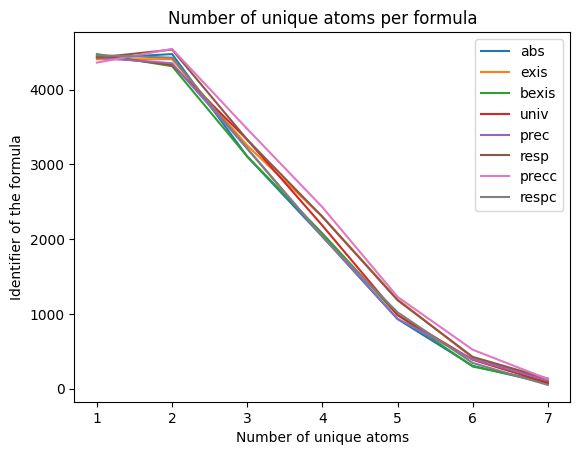

In [8]:
data = plot_atoms_variation(df_f_ops, SUBDIR)

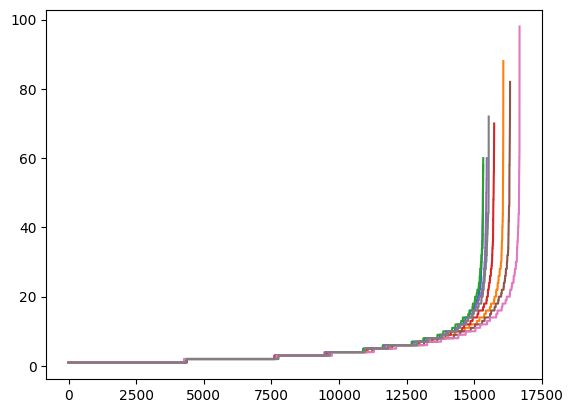

In [9]:
for d in data:
    not_aggregated = d.transpose().sum()
    # not_aggregated.sort_index(key=not_aggregated.sum(1).get)
    # plt.plot()
    not_aggregated_2 = pd.DataFrame({'data': not_aggregated.sort_values()})
    # plt.plot(not_aggregated_2[0])
    not_aggregated_2 = not_aggregated_2.reset_index()
    plt.plot(not_aggregated_2['data'])

## Plotting

In [10]:
# for i in patterns:
#     grid_plot = plot_grid_barplots(merged_metrics_df[i], grid_cell_field= 'metric',
#               y_axis = 'value', x_axis = 'strategy',
#               order = ['orchestration', 'migration', 'choreography'])

#grid_plot.savefig("output/out.png")

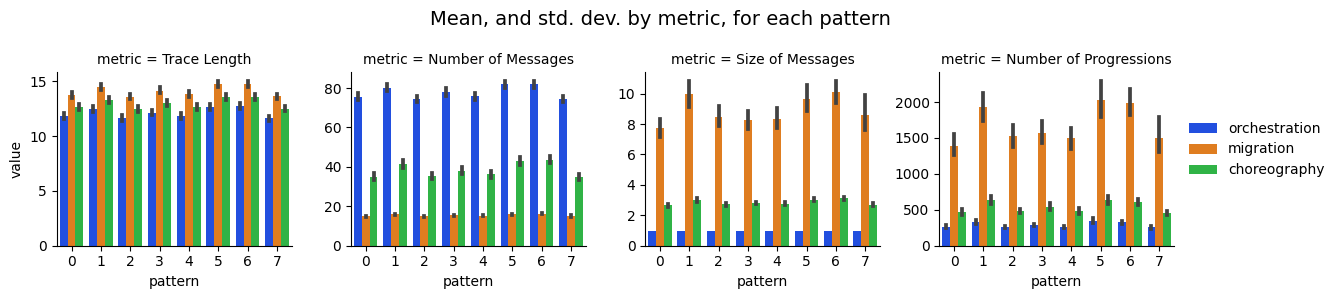

In [11]:
merged_metrics_dfp = prepare_with_pattern(merged_metrics_df)
plot = plot_metrics_by_patterns(merged_metrics_dfp)
plot.savefig(f"output/pattern_{SUBDIR}.png")
plot

In [12]:
expanded_f_df = [sep_strat_f_df[i].merge(df_f_ops[i], left_index=True, right_index=True) for i in PATTERNS]
expanded_f_df[0].head()

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,227,228,229,230,231,232,233,234,235,236
0,0,1,2,7,1.0,8,"Until (Var ""c"", Var ""f"")",{ |b|c|d| | |g} ; { |b| | |e|f|g} ; {a| | | |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.0,8,"Until (Var ""b"", Var ""g"")",{a|b| | |e| | } ; { | |c|d| |f| } ; {a| |c|d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,14,1.0,6,"Glob (Var ""a"")",{a|b|c|d| | | } ; {a| | | | |f|g} ; { |b|c| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.0,3,"Next (Var ""d"")",{a|b| | |e|f| } ; {a| |c| | | |g} ; { |b|c| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,7,1.0,3,"Next (Var ""e"")",{a| |c|d|e|f| } ; { |b|c|d|e|f|g} ; { | | |d|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in PATTERNS:
    expanded_f_df[i].strategy = pd.Categorical(expanded_f_df[i].strategy)
    expanded_f_df[i]['strategy_id'] = expanded_f_df[i].strategy.cat.codes

full_scale_df_7 = pd.concat(expanded_f_df)
full_scale_df_7.head()

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,331,332,333,334,335,336,337,338,339,340
0,0,1,2,7,1.0,8,"Until (Var ""c"", Var ""f"")",{ |b|c|d| | |g} ; { |b| | |e|f|g} ; {a| | | |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.0,8,"Until (Var ""b"", Var ""g"")",{a|b| | |e| | } ; { | |c|d| |f| } ; {a| |c|d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,14,1.0,6,"Glob (Var ""a"")",{a|b|c|d| | | } ; {a| | | | |f|g} ; { |b|c| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.0,3,"Next (Var ""d"")",{a|b| | |e|f| } ; {a| |c| | | |g} ; { |b|c| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,7,1.0,3,"Next (Var ""e"")",{a| |c|d|e|f| } ; { |b|c|d|e|f|g} ; { | | |d|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
merged_metrics_dfp[0]

,index,strategy,value,metric,pattern
0,0,orchestration,2.0,trace_len,0
1,1,orchestration,2.0,trace_len,0
2,2,orchestration,3.0,trace_len,0
3,3,orchestration,2.0,trace_len,0
4,4,orchestration,2.0,trace_len,0
...,...,...,...,...,...
61327,15328,choreography,626.0,nb_progressions,0
61328,15329,choreography,2243.0,nb_progressions,0
61329,15330,choreography,81960.0,nb_progressions,0
61330,15331,choreography,1811.0,nb_progressions,0


In [15]:
test = pd.concat(merged_metrics_dfp)
test

,index,strategy,value,metric,pattern
0,0,orchestration,2.0,trace_len,0
1,1,orchestration,2.0,trace_len,0
2,2,orchestration,3.0,trace_len,0
3,3,orchestration,2.0,trace_len,0
4,4,orchestration,2.0,trace_len,0
...,...,...,...,...,...
62155,15535,choreography,256.0,nb_progressions,7
62156,15536,choreography,373.0,nb_progressions,7
62157,15537,choreography,2873.0,nb_progressions,7
62158,15538,choreography,104.0,nb_progressions,7
